# Panorama Productivo
---
## Producción agropecuaria
Se consultaron las "Evaluaciones Agropecuarias Municipales 2023" de la Unidad de Planificación Rural Agropecuaria (UPRA) para conocer cuáles fueron los cultivos con mayor producción en toneladas entre 2021 y 2023 y así conocer la oferta agrícola del municipio.

In [8]:
import pandas as pd
# Load the data from the text files
eva_df = pd.read_csv('data/eva.txt', sep='\t')
# Correct the column splitting process for eva_df
eva_df = eva_df['Código Dane municipio|Desagregación cultivo|Producción (t)'].str.split('|', expand=True)
eva_df.columns = ['Código Dane municipio', 'Desagregación cultivo', 'Producción (t)']
eva_df['Producción (t)'] = eva_df['Producción (t)'].str.replace(',', '.').astype(float)
eva_df.head()

,Código Dane municipio,Desagregación cultivo,Producción (t)
0,05001,Aguacate Hass,257.00
1,05001,Aguacate demás variedades,129.36
2,05001,Ahuyama,5.40
3,05001,Ajo,88.00
4,05001,Ají,38.99


# Población Diferencial
---
Con el fin de caracterizar la población diferencial residente en cada municipio de Colombia, se recurrió a las siguientes fuentes de información:

## Población Municipal
**Fuente: Proyecciones de población municipal por área, sexo y edad para 2024, DANE**

Permite identificar el porcentaje de la población que corresponde a mujeres y a jóvenes entre 14 y 28 años (Ley 1622 de 2013).

In [11]:
# Load the data from the text files
proyecciones_poblacion_df = pd.read_csv('data/Proyecciones_poblacion.txt', sep='|')
proyecciones_poblacion_df.head()

,Cod. Municipio,Departamento,Municipio,AÑO,Población municipio,Total Hombres,Total Mujeres,% mujeres municipio,% jóvenes municipio
0,5001,Antioquia,Medellín,2024,2616335,1232017,1384318,"52,91057911161988","23,49217512283404"
1,5002,Antioquia,Abejorral,2024,21468,11230,10238,"47,689584497857275","19,638531768213156"
2,5004,Antioquia,Abriaquí,2024,2855,1549,1306,"45,74430823117338","20,875656742556917"
3,5021,Antioquia,Alejandría,2024,4955,2454,2501,"50,474268415741676","19,414732593340062"
4,5030,Antioquia,Amagá,2024,32412,15890,16522,"50,97494755029002","22,328150067876095"


## Pobreza y Hogares Ocupados Informales
**Fuente: Medida de Pobreza Multidimensional Municipal 2018,DANE**

Permite identificar el porcentaje de la población en situación de pobreza y el porcentaje de hogares que tienen ocupados informales.

In [14]:
ipm_df = pd.read_csv('data/IPM.txt', sep='|')
ipm_df.head()

,Cod. Municipio,Departamento,Municipio,% pobreza municipio,% informalidad municipio
0,5001,Antioquia,Medellín,"12,8","71,0"
1,5002,Antioquia,Abejorral,"40,6","87,5"
2,5004,Antioquia,Abriaquí,"34,8","87,6"
3,5021,Antioquia,Alejandría,"31,9","87,1"
4,5030,Antioquia,Amagá,"22,9","69,5"


In [1]:
import pandas as pd
# Load the data from the text files
eva_df = pd.read_csv('eva.txt', sep='\t')
ipm_df = pd.read_csv('IPM.txt', sep='\t')
datos_censo_df = pd.read_csv('Datos_censo_por_municipios.txt', sep='\t')

,Código Dane municipio|Desagregación cultivo|Producción (t)
0,"05001|Aguacate Hass|257,0"
1,"05001|Aguacate demás variedades|129,36"
2,"05001|Ahuyama|5,4"
3,"05001|Ajo|88,0"
4,"05001|Ají|38,989999999999995"


In [2]:
# Display the first few rows of the IPM dataframe
ipm_df.head()

,Cod. Municipio|Departamento|Municipio|% pobreza municipio|% informalidad municipio
0,"05001|Antioquia|Medellín|12,8|71,0"
1,"05002|Antioquia|Abejorral|40,6|87,5"
2,"05004|Antioquia|Abriaquí|34,8|87,6"
3,"05021|Antioquia|Alejandría|31,9|87,1"
4,"05030|Antioquia|Amagá|22,9|69,5"


In [3]:
# Display the first few rows of the Datos Censo dataframe
datos_censo_df.head()

,Cod. Municipio|CON_DISCAPACIDAD|ETNICO|EDUC_MEDIA|TECNICO/TECNOLOGO|PREGRADO|POSGRADO|Mayor20|TOTAL|PET|OCU|DSO|FT|% pobl. con discapacidad municipio|% grupos étnicos municipio|% pobl. con educación media municipio|% pobl. con edu. técnica/tecnología municipio|% pobl. con pregrado municipio|% pobl. con posgrado municipio|TGP|Tasa ocupación|Tasa desempleo
0,05001|148803|61560|548969|233933|263487|82183|...
1,05002|2824|64|1736|398|293|148|12445|17599|140...
2,05004|361|44|365|100|48|20|1512|2159|1724|829|...
3,05021|311|12|441|203|109|28|2660|3839|2982|149...
4,05030|2420|139|5230|1458|735|189|19493|26821|2...


In [4]:
# Correct the column splitting process for eva_df
eva_df = eva_df['Código Dane municipio|Desagregación cultivo|Producción (t)'].str.split('|', expand=True)
eva_df.columns = ['Código Dane municipio', 'Desagregación cultivo', 'Producción (t)']
eva_df['Producción (t)'] = eva_df['Producción (t)'].str.replace(',', '.').astype(float)
eva_df.head()

,Código Dane municipio,Desagregación cultivo,Producción (t)
0,05001,Aguacate Hass,257.00
1,05001,Aguacate demás variedades,129.36
2,05001,Ahuyama,5.40
3,05001,Ajo,88.00
4,05001,Ají,38.99


In [5]:
# Clean and preprocess the IPM data
ipm_df = ipm_df['Cod. Municipio|Departamento|Municipio|% pobreza municipio|% informalidad municipio'].str.split('|', expand=True)
ipm_df.columns = ['Cod. Municipio', 'Departamento', 'Municipio', '% pobreza municipio', '% informalidad municipio']
ipm_df['% pobreza municipio'] = ipm_df['% pobreza municipio'].str.replace(',', '.').astype(float)
ipm_df['% informalidad municipio'] = ipm_df['% informalidad municipio'].str.replace(',', '.').astype(float)
ipm_df.head()

,Cod. Municipio,Departamento,Municipio,% pobreza municipio,% informalidad municipio
0,05001,Antioquia,Medellín,12.8,71.0
1,05002,Antioquia,Abejorral,40.6,87.5
2,05004,Antioquia,Abriaquí,34.8,87.6
3,05021,Antioquia,Alejandría,31.9,87.1
4,05030,Antioquia,Amagá,22.9,69.5


In [6]:
# Clean and preprocess the Datos Censo data
datos_censo_df = datos_censo_df['Cod. Municipio|CON_DISCAPACIDAD|ETNICO|EDUC_MEDIA|TECNICO/TECNOLOGO|PREGRADO|POSGRADO|Mayor20|TOTAL|PET|OCU|DSO|FT|% pobl. con discapacidad municipio|% grupos étnicos municipio|% pobl. con educación media municipio|% pobl. con edu. técnica/tecnología municipio|% pobl. con pregrado municipio|% pobl. con posgrado municipio|TGP|Tasa ocupación|Tasa desempleo'].str.split('|', expand=True)
datos_censo_df.columns = ['Cod. Municipio', 'CON_DISCAPACIDAD', 'ETNICO', 'EDUC_MEDIA', 'TECNICO/TECNOLOGO', 'PREGRADO', 'POSGRADO', 'Mayor20', 'TOTAL', 'PET', 'OCU', 'DSO', 'FT', '% pobl. con discapacidad municipio', '% grupos étnicos municipio', '% pobl. con educación media municipio', '% pobl. con edu. técnica/tecnología municipio', '% pobl. con pregrado municipio', '% pobl. con posgrado municipio', 'TGP', 'Tasa ocupación', 'Tasa desempleo']

# Convert percentage columns to float
datos_censo_df['% pobl. con discapacidad municipio'] = datos_censo_df['% pobl. con discapacidad municipio'].str.replace(',', '.').astype(float)
datos_censo_df['% grupos étnicos municipio'] = datos_censo_df['% grupos étnicos municipio'].str.replace(',', '.').astype(float)
datos_censo_df['% pobl. con educación media municipio'] = datos_censo_df['% pobl. con educación media municipio'].str.replace(',', '.').astype(float)
datos_censo_df['% pobl. con edu. técnica/tecnología municipio'] = datos_censo_df['% pobl. con edu. técnica/tecnología municipio'].str.replace(',', '.').astype(float)
datos_censo_df['% pobl. con pregrado municipio'] = datos_censo_df['% pobl. con pregrado municipio'].str.replace(',', '.').astype(float)
datos_censo_df['% pobl. con posgrado municipio'] = datos_censo_df['% pobl. con posgrado municipio'].str.replace(',', '.').astype(float)
datos_censo_df.head()

,Cod. Municipio,CON_DISCAPACIDAD,ETNICO,EDUC_MEDIA,TECNICO/TECNOLOGO,PREGRADO,POSGRADO,Mayor20,TOTAL,PET,...,FT,% pobl. con discapacidad municipio,% grupos étnicos municipio,% pobl. con educación media municipio,% pobl. con edu. técnica/tecnología municipio,% pobl. con pregrado municipio,% pobl. con posgrado municipio,TGP,Tasa ocupación,Tasa desempleo
0,05001,148803,61560,548969,233933,263487,82183,1781943,2372330,1966127,...,1194353,6.272441,2.594917,30.807327,13.127973,14.786500,4.611988,"60,746482806044575","54,67846176772915","9,989090327566473"
1,05002,2824,64,1736,398,293,148,12445,17599,14051,...,7272,16.046366,0.363657,13.949377,3.198072,2.354359,1.189233,"51,754323535691405","50,98569496832965","1,4851485148514851"
2,05004,361,44,365,100,48,20,1512,2159,1724,...,859,16.720704,2.037981,24.140212,6.613757,3.174603,1.322751,"49,82598607888631","48,085846867749424","3,4924330616996504"
3,05021,311,12,441,203,109,28,2660,3839,2982,...,1527,8.101068,0.312581,16.578947,7.631579,4.097744,1.052632,"51,20724346076459","50,201207243460765","1,9646365422396856"
4,05030,2420,139,5230,1458,735,189,19493,26821,21783,...,11626,9.022781,0.518251,26.830144,7.479608,3.770584,0.969579,"53,37189551485103","49,437634852866914","7,371408911061414"


In [7]:
# Convert remaining percentage columns to float
datos_censo_df['TGP'] = datos_censo_df['TGP'].str.replace(',', '.').astype(float)
datos_censo_df['Tasa ocupación'] = datos_censo_df['Tasa ocupación'].str.replace(',', '.').astype(float)
datos_censo_df['Tasa desempleo'] = datos_censo_df['Tasa desempleo'].str.replace(',', '.').astype(float)

datos_censo_df.head()

,Cod. Municipio,CON_DISCAPACIDAD,ETNICO,EDUC_MEDIA,TECNICO/TECNOLOGO,PREGRADO,POSGRADO,Mayor20,TOTAL,PET,...,FT,% pobl. con discapacidad municipio,% grupos étnicos municipio,% pobl. con educación media municipio,% pobl. con edu. técnica/tecnología municipio,% pobl. con pregrado municipio,% pobl. con posgrado municipio,TGP,Tasa ocupación,Tasa desempleo
0,05001,148803,61560,548969,233933,263487,82183,1781943,2372330,1966127,...,1194353,6.272441,2.594917,30.807327,13.127973,14.786500,4.611988,60.746483,54.678462,9.989090
1,05002,2824,64,1736,398,293,148,12445,17599,14051,...,7272,16.046366,0.363657,13.949377,3.198072,2.354359,1.189233,51.754324,50.985695,1.485149
2,05004,361,44,365,100,48,20,1512,2159,1724,...,859,16.720704,2.037981,24.140212,6.613757,3.174603,1.322751,49.825986,48.085847,3.492433
3,05021,311,12,441,203,109,28,2660,3839,2982,...,1527,8.101068,0.312581,16.578947,7.631579,4.097744,1.052632,51.207243,50.201207,1.964637
4,05030,2420,139,5230,1458,735,189,19493,26821,21783,...,11626,9.022781,0.518251,26.830144,7.479608,3.770584,0.969579,53.371896,49.437635,7.371409


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the dataframes on 'Cod. Municipio'
merged_df = pd.merge(eva_df, ipm_df, left_on='Código Dane municipio', right_on='Cod. Municipio')
merged_df = pd.merge(merged_df, datos_censo_df, on='Cod. Municipio')

# Display the first few rows of the merged dataframe
merged_df.head()

,Código Dane municipio,Desagregación cultivo,Producción (t),Cod. Municipio,Departamento,Municipio,% pobreza municipio,% informalidad municipio,CON_DISCAPACIDAD,ETNICO,...,FT,% pobl. con discapacidad municipio,% grupos étnicos municipio,% pobl. con educación media municipio,% pobl. con edu. técnica/tecnología municipio,% pobl. con pregrado municipio,% pobl. con posgrado municipio,TGP,Tasa ocupación,Tasa desempleo
0,05001,Aguacate Hass,257.00,05001,Antioquia,Medellín,12.8,71.0,148803,61560,...,1194353,6.272441,2.594917,30.807327,13.127973,14.7865,4.611988,60.746483,54.678462,9.98909
1,05001,Aguacate demás variedades,129.36,05001,Antioquia,Medellín,12.8,71.0,148803,61560,...,1194353,6.272441,2.594917,30.807327,13.127973,14.7865,4.611988,60.746483,54.678462,9.98909
2,05001,Ahuyama,5.40,05001,Antioquia,Medellín,12.8,71.0,148803,61560,...,1194353,6.272441,2.594917,30.807327,13.127973,14.7865,4.611988,60.746483,54.678462,9.98909
3,05001,Ajo,88.00,05001,Antioquia,Medellín,12.8,71.0,148803,61560,...,1194353,6.272441,2.594917,30.807327,13.127973,14.7865,4.611988,60.746483,54.678462,9.98909
4,05001,Ají,38.99,05001,Antioquia,Medellín,12.8,71.0,148803,61560,...,1194353,6.272441,2.594917,30.807327,13.127973,14.7865,4.611988,60.746483,54.678462,9.98909


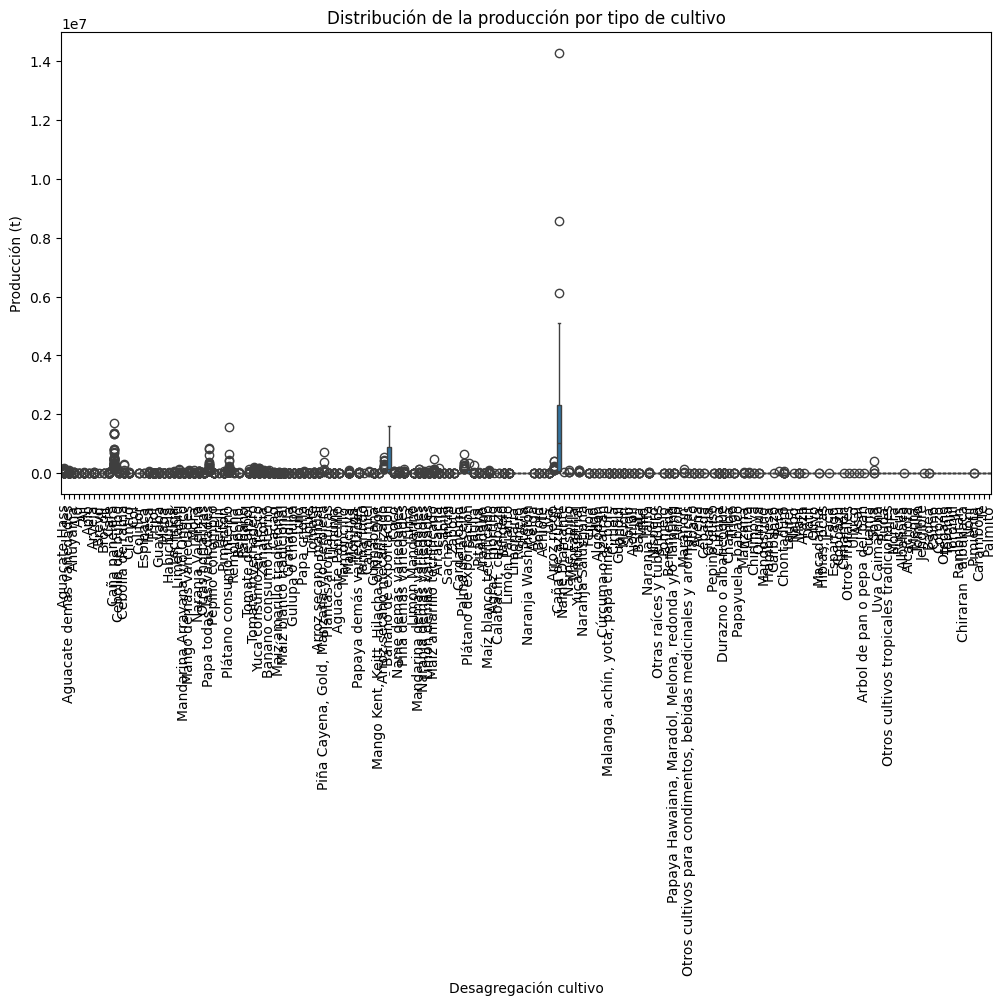

In [10]:
# Plotting the distribution of production by crop type
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='Desagregación cultivo', y='Producción (t)')
plt.xticks(rotation=90)
plt.title('Distribución de la producción por tipo de cultivo')
plt.show()

La gráfica muestra cómo se distribuye la producción de diferentes tipos de cultivos en términos de toneladas. Cada caja representa un tipo de cultivo y muestra la variabilidad de la producción para ese cultivo en diferentes municipios.

La línea dentro de cada caja indica la mediana de la producción, mientras que los bordes de la caja muestran el rango intercuartílico (el 50% central de los datos). Los "bigotes" se extienden para mostrar el resto de la distribución, excepto los valores atípicos, que se representan como puntos individuales. Esta gráfica te ayuda a comparar rápidamente la producción de diferentes cultivos y a identificar cuáles tienen una producción más consistente o variable.

Para apreciar mejor la información,a continuación se presentan los cultivos tienen los niveles de producción más altos:

In [15]:
production_by_crop = merged_df.groupby('Desagregación cultivo')['Producción (t)'].sum().sort_values()
#production_by_crop.plot(kind='barh')
production_by_crop.nlargest(30)

,Producción (t)
Desagregación cultivo,
Caña de azúcar,9.293332e+07
Caña panelera,3.997225e+07
Plátano consumo interno,1.333664e+07
Papa todas las variedades,1.046164e+07
Palma de aceite,6.841296e+06
Yuca consumo en fresco,6.375587e+06
Banano de exportación,6.140821e+06
Arroz secano mecanizado,5.440642e+06
Arroz riego,5.052942e+06


**Estos cultivos tienen los niveles de producción más altos:**

1. Caña de azúcar: 92,933,320 t
2. Caña panelera: 39,972,250 t
3. Plátano consumo interno: 13,336,640 t
4. Papa todas las variedades: 10,461,640 t
5. Palma de aceite: 6,841,296 t
6. Yuca consumo en fresco: 6,375,587 t
7. Banano de exportación: 6,140,821 t
8. Arroz secano mecanizado: 5,440,642 t
9. Arroz riego: 5,052,942 t
10. Maíz amarillo tecnificado: 2,155,908 t
11. Café: 2,110,191 t
12. Tomate invernadero: 1,785,965 t
13. Piña Cayena, Gold, Manzana y/o Perolera: 1,703,736 t
14. Cebolla de rama: 1,056,149 t
15. Mango demás variedades: 1,049,161 t
16. Piña demás variedades: 993,357 t
17. Limón Tahití: 887,088 t
18. Maíz blanco tecnificado: 866,979 t
19. Zanahoria: 849,031 t
20. Cebolla de bulbo: 838,904 t
21. Tomate: 835,301 t
22. Caña miel: 784,229 t
23. Ñame demás variedades: 779,453 t
24. Papa criolla: 723,279 t
25. Yuca industrial: 678,508 t

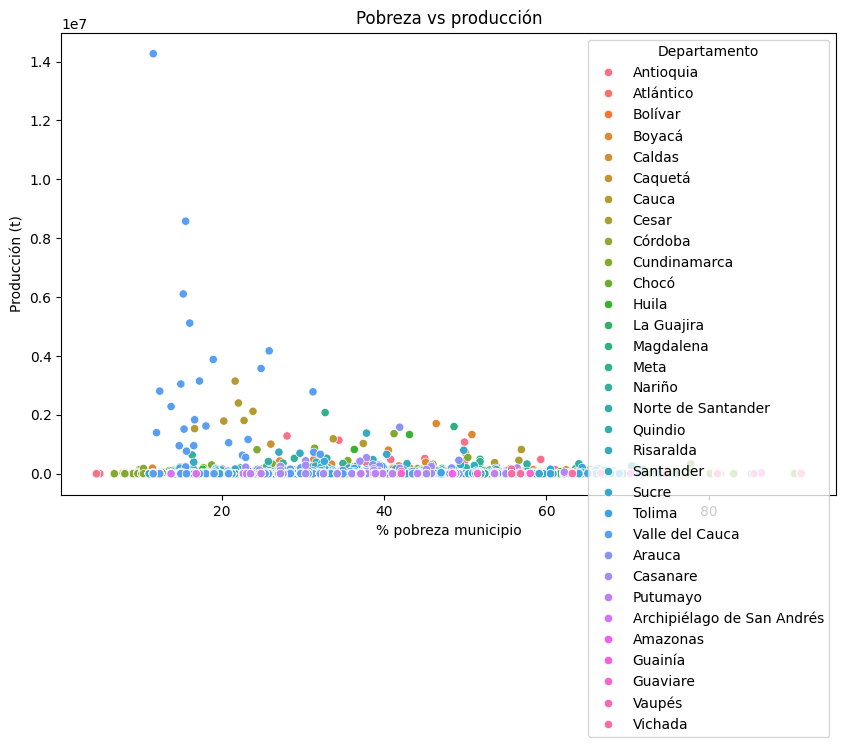

In [11]:
# Plotting poverty vs productionPoverty vs Production
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='% pobreza municipio', y='Producción (t)', hue='Departamento')
plt.title('Pobreza vs producción')
plt.show()

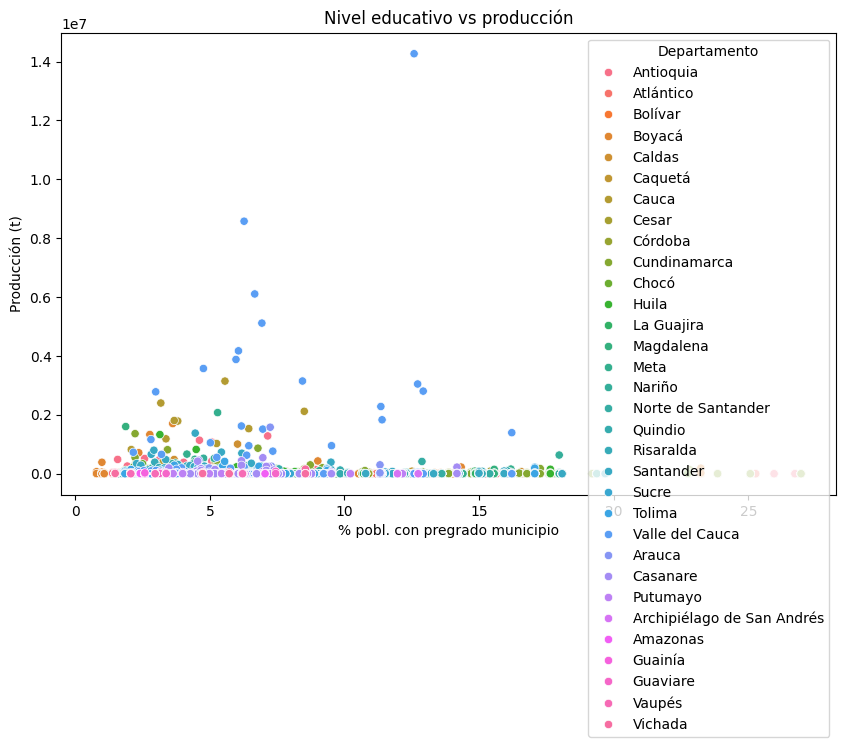

In [12]:
# Plotting education level vs production
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='% pobl. con pregrado municipio', y='Producción (t)', hue='Departamento')
plt.title('Nivel educativo vs producción')
plt.show()